In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from numpy import average
from scipy import stats
from matplotlib import cm
from statistics import median
import gc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from collections import namedtuple
from shapely import geometry




%matplotlib inline


In [3]:
#BDD 

all_zostoga_bdd = xr.open_dataset("/Users/loulou/Desktop/LOCEAN/TS_YE/ALL_2000_2250_1M_scsshtst.nc", engine="netcdf4", decode_times=False)
buoy_zostoga_bdd = xr.open_dataset("/Users/loulou/Desktop/LOCEAN/TS_YE/BUOY_2000_2250_1M_scsshtst.nc", engine="netcdf4", decode_times=False)
ctl_zostoga_bdd = xr.open_dataset("/Users/loulou/Desktop/LOCEAN/TS_YE/CTL-nofrz_2000_2250_1M_scsshtst.nc", engine="netcdf4", decode_times=False)
heat_zostoga_bdd = xr.open_dataset("/Users/loulou/Desktop/LOCEAN/TS_YE/HEAT_2000_2250_1M_scsshtst.nc", engine="netcdf4", decode_times=False)
stress_zostoga_bdd = xr.open_dataset("/Users/loulou/Desktop/LOCEAN/TS_YE/STRESS_2000_2250_1M_scsshtst.nc", engine="netcdf4", decode_times=False)
water_zostoga_bdd = xr.open_dataset("/Users/loulou/Desktop/LOCEAN/TS_YE/WATER_2000_2250_1M_scsshtst.nc", engine="netcdf4", decode_times=False)
                             
all_zos_bdd = xr.open_dataset("/Users/loulou/Desktop/LOCEAN/TS_YE/ALL_2000_2250_1M_sshdyn.nc", engine="netcdf4", decode_times=False)
buoy_zos_bdd = xr.open_dataset("/Users/loulou/Desktop/LOCEAN/TS_YE/BUOY_2000_2250_1M_sshdyn.nc", engine="netcdf4", decode_times=False)
ctl_zos_bdd = xr.open_dataset("/Users/loulou/Desktop/LOCEAN/TS_YE/CTL-nofrz_2000_2250_1M_sshdyn.nc", engine="netcdf4", decode_times=False)
heat_zos_bdd = xr.open_dataset("/Users/loulou/Desktop/LOCEAN/TS_YE/HEAT_2000_2250_1M_sshdyn.nc", engine="netcdf4", decode_times=False)
stress_zos_bdd = xr.open_dataset("/Users/loulou/Desktop/LOCEAN/TS_YE/STRESS_2000_2250_1M_sshdyn.nc", engine="netcdf4", decode_times=False)
water_zos_bdd = xr.open_dataset("/Users/loulou/Desktop/LOCEAN/TS_YE/WATER_2000_2250_1M_sshdyn.nc", engine="netcdf4", decode_times=False)
                           
ds_area_Ofx = xr.open_dataset("/Users/loulou/Desktop/LOCEAN/areacello_Ofx_IPSL-CM6A-LR_piControl_r1i1p1f1_gn.nc")


In [4]:
all_zostoga = all_zostoga_bdd.scsshtst[:,0,0]
buoy_zostoga = buoy_zostoga_bdd.scsshtst[:,0,0]
ctl_zostoga = ctl_zostoga_bdd.scsshtst[:,0,0]
heat_zostoga = heat_zostoga_bdd.scsshtst[:,0,0]
stress_zostoga = stress_zostoga_bdd.scsshtst[:,0,0]
water_zostoga = water_zostoga_bdd.scsshtst[:,0,0]


In [5]:
all_zos = all_zos_bdd.sshdyn
buoy_zos = buoy_zos_bdd.sshdyn
ctl_zos = ctl_zos_bdd.sshdyn
heat_zos = heat_zos_bdd.sshdyn
stress_zos = stress_zos_bdd.sshdyn
water_zos = water_zos_bdd.sshdyn


In [6]:
ZOS = [ctl_zos,all_zos,heat_zos,water_zos,buoy_zos,stress_zos]

In [7]:
areacello = ds_area_Ofx.areacello

In [8]:
%store -r indice_ocean

In [9]:
%store -r ToE_heat_pos
%store -r ToE_heat_neg

%store -r ToE_stress_pos
%store -r ToE_stress_neg

%store -r ToE_buoy_pos
%store -r ToE_buoy_neg

%store -r ToE_all_pos
%store -r ToE_all_neg

%store -r ToE_water_pos
%store -r ToE_water_neg

In [17]:
ToE_simus_pos = [ToE_all_pos,ToE_heat_pos,ToE_water_pos,ToE_buoy_pos,ToE_stress_pos]
ToE_simus_neg = [ToE_all_neg,ToE_heat_neg,ToE_water_neg,ToE_buoy_neg,ToE_stress_neg]

In [16]:
SD_ctl = np.std(ctl_zos, axis=0) 

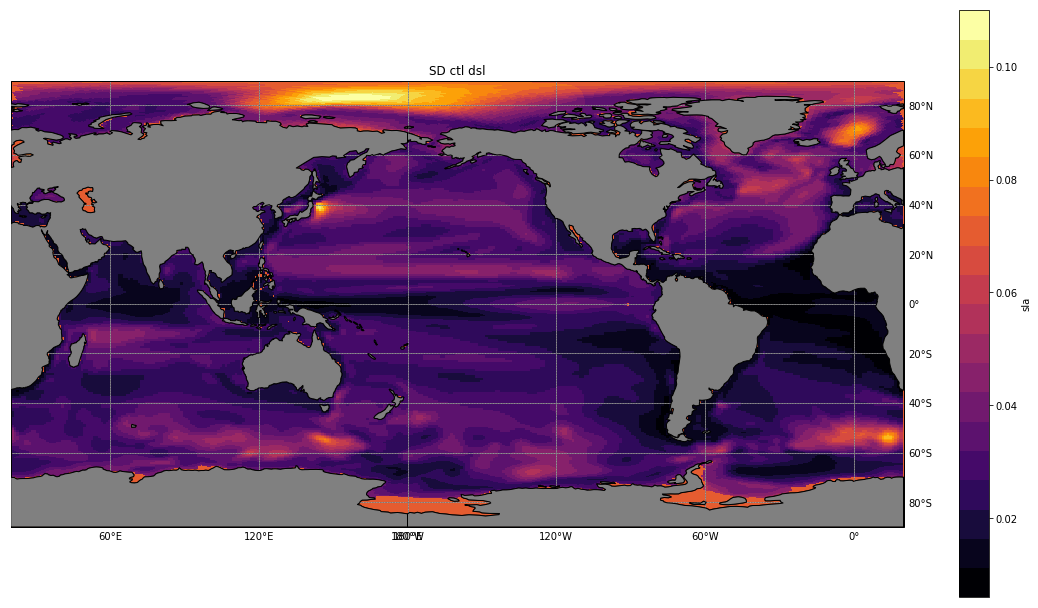

In [17]:
figTS,ax = plt.subplots(1,1,figsize=(20,12), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160.0)})

SD_ctl.plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('inferno', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical', shrink=0.9,label='sla'))



ax.gridlines()
cs = ax.coastlines(resolution='110m', linewidth=1)

ax.set_title('SD ctl dsl')


ax.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Def boîte

In [18]:
# def index lat, lon PSE

lat_min_PSE = 96
lat_max_PSE = 171
lon_min_PSE = 178
lon_max_PSE = 217


In [19]:
# def index lat, lon Atl Tropical

lat_min_AT = 151
lat_max_AT = 221
lon_min_AT = 228
lon_max_AT = 297

In [20]:
# def index lat, lon Indien

lat_min_ind = 162
lat_max_ind = 232

lon_min1_ind = 0
lon_max1_ind = 25

lon_min2_ind = 330
lon_max2_ind = 362

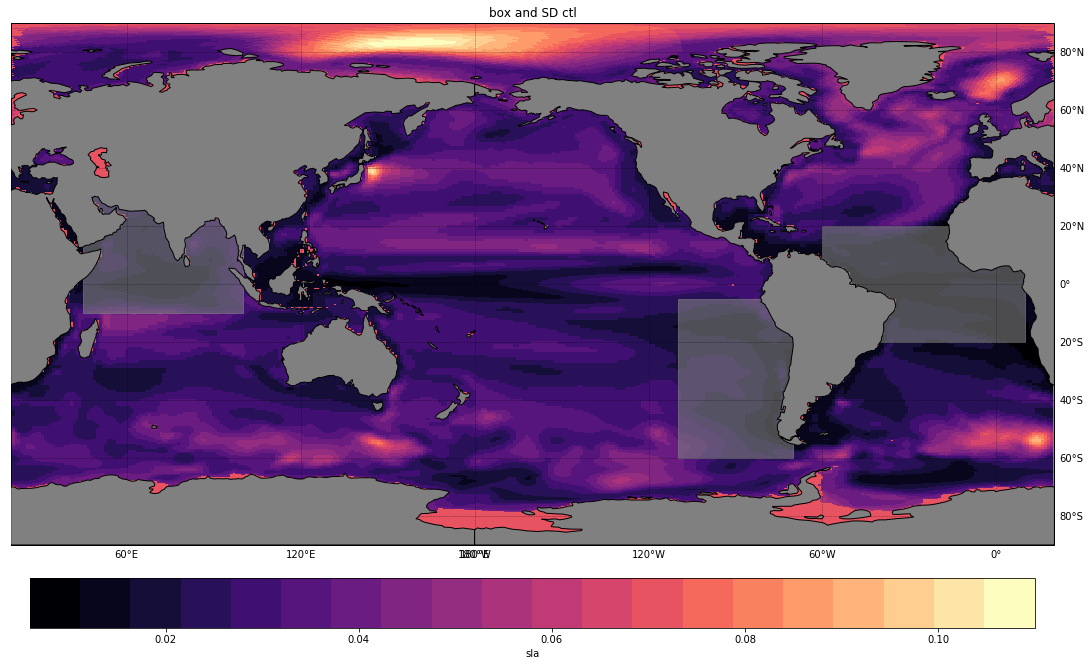

In [22]:
Region = namedtuple('Region',field_names=['region_name','lonmin','lonmax','latmin','latmax'])


sub_region_ind =  Region(
        region_name="highlands_region",
        lonmin=45,
        lonmax=100,
        latmin=-10,
        latmax=30
)


sub_region_PSE =  Region(
        region_name="highlands_region",
        lonmin=-110,
        lonmax=-70,
        latmin=-60,
        latmax=-5
)

sub_region_AT =  Region(
        region_name="highlands_region",
        lonmin=-60,
        lonmax=10,
        latmin=-20,
        latmax=20
)

def add_sub_region_box(ax, subregion):
    """ """
    geom = geometry.box(minx=subregion.lonmin,maxx=subregion.lonmax,miny=subregion.latmin,maxy=subregion.latmax)
    ax.add_geometries([geom], crs=cartopy.crs.PlateCarree(), color='grey', alpha=0.6)
    return ax


figTS,ax = plt.subplots(1,1,figsize=(20,12), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160.0)})


add_sub_region_box(ax, sub_region_ind)
add_sub_region_box(ax, sub_region_PSE)
add_sub_region_box(ax, sub_region_AT)

SD_ctl.plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('magma', 20),#plt.cm.get_cmap('turbo', 20)
                        transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='horizontal', pad=0.05, shrink=0.9, label='sla'))





ax.title.set_text('box and SD ctl')



ax.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


# Zostoga

In [26]:
x = [t for t in range(251)]

slope, intercept, r_value, p_value, std_err = stats.linregress(x, ctl_zostoga)
slope, intercept

(-0.000142157894229328, -6.194874840247701)

In [27]:
#Construction de zostoga detrended

all_zostoga_det = all_zostoga.copy()
ctl_zostoga_det = ctl_zostoga.copy()
heat_zostoga_det = heat_zostoga.copy()
water_zostoga_det = water_zostoga.copy()
buoy_zostoga_det = buoy_zostoga.copy()
stress_zostoga_det = stress_zostoga.copy()

for t in range(251):
    
    all_zostoga_det[t] = all_zostoga[t,] - (slope*t + all_zostoga[0])
    ctl_zostoga_det[t] = ctl_zostoga[t,] - (slope*t + ctl_zostoga[0])
    heat_zostoga_det[t] = heat_zostoga[t,] - (slope*t + heat_zostoga[0])
    water_zostoga_det[t] = water_zostoga[t,] - (slope*t + water_zostoga[0])
    buoy_zostoga_det[t] = buoy_zostoga[t,] - (slope*t + buoy_zostoga[0])
    stress_zostoga_det[t] = stress_zostoga[t,] - (slope*t + stress_zostoga[0])


In [28]:
ZOSTOGA = [ctl_zostoga_det,all_zostoga_det,heat_zostoga_det,water_zostoga_det,buoy_zostoga_det,stress_zostoga_det]

# Box

In [22]:
ZOS_ind = []
ZOS_PSE = []
ZOS_AT = []

for i in range(6):
    
    ZOS_ind.append(xr.concat((ZOS[i][:,lat_min_ind:lat_max_ind,lon_min1_ind:lon_max1_ind].copy(),ZOS[i][:,lat_min_ind:lat_max_ind,lon_min2_ind:lon_max2_ind].copy()),dim='x'))
    ZOS_PSE.append(ZOS[i][:,lat_min_PSE:lat_max_PSE,lon_min_PSE:lon_max_PSE].copy())
    ZOS_AT.append(ZOS[i][:,lat_min_AT:lat_max_AT,lon_min_AT:lon_max_AT].copy())
    


In [23]:
ToE_simus_pos_ind = []
ToE_simus_pos_PSE = []
ToE_simus_pos_AT = []

ToE_simus_neg_ind = []
ToE_simus_neg_PSE = []
ToE_simus_neg_AT = []

for i in range(5):
    ToE_simus_pos_ind.append(xr.concat((ToE_simus_pos[i][lat_min_ind:lat_max_ind,lon_min1_ind:lon_max1_ind].copy(),ToE_simus_pos[i][lat_min_ind:lat_max_ind,lon_min2_ind:lon_max2_ind].copy()),dim='x'))                               
    ToE_simus_neg_ind.append(xr.concat((ToE_simus_neg[i][lat_min_ind:lat_max_ind,lon_min1_ind:lon_max1_ind].copy(),ToE_simus_neg[i][lat_min_ind:lat_max_ind,lon_min2_ind:lon_max2_ind].copy()),dim='x'))                               
    ToE_simus_pos_PSE.append(ToE_simus_pos[i][lat_min_PSE:lat_max_PSE,lon_min_PSE:lon_max_PSE].copy())
    ToE_simus_neg_PSE.append(ToE_simus_neg[i][lat_min_PSE:lat_max_PSE,lon_min_PSE:lon_max_PSE].copy())
    ToE_simus_pos_AT.append(ToE_simus_pos[i][lat_min_AT:lat_max_AT,lon_min_AT:lon_max_AT].copy())
    ToE_simus_pos_AT.append(ToE_simus_neg[i][lat_min_AT:lat_max_AT,lon_min_AT:lon_max_AT].copy())
    

In [24]:
SD_ctl_ind = xr.concat((SD_ctl[lat_min_ind:lat_max_ind,lon_min1_ind:lon_max1_ind].copy(),SD_ctl[lat_min_ind:lat_max_ind,lon_min2_ind:lon_max2_ind].copy()),dim='x')
SD_ctl_PSE = SD_ctl[lat_min_PSE:lat_max_PSE,lon_min_PSE:lon_max_PSE].copy()
SD_ctl_AT = SD_ctl[lat_min_AT:lat_max_AT,lon_min_AT:lon_max_AT].copy()

In [29]:
gmtsl_all = []
gmtsl_ctl = []
gmtsl_buoy = []
gmtsl_heat = []
gmtsl_water = []
gmtsl_stress = []

GMTSL = [gmtsl_ctl,gmtsl_all,gmtsl_heat,gmtsl_water,gmtsl_buoy,gmtsl_stress]

for t in range(251):
    for i in range(6):        
        GMTSL[i].append(ZOS[i][t,:,:] + float(ZOSTOGA[i][t]))


In [30]:
GMTSL_ind = [[],[],[],[],[],[]]
GMTSL_PSE = [[],[],[],[],[],[]]
GMTSL_AT = [[],[],[],[],[],[]]

for i in range(6):
    for t in range(251):
        GMTSL_ind[i].append(xr.concat((GMTSL[i][t][lat_min_ind:lat_max_ind,lon_min1_ind:lon_max1_ind].copy(),GMTSL[i][t][lat_min_ind:lat_max_ind,lon_min2_ind:lon_max2_ind].copy()),dim='x'))
        GMTSL_PSE[i].append(GMTSL[i][t][lat_min_PSE:lat_max_PSE,lon_min_PSE:lon_max_PSE].copy())
        GMTSL_AT[i].append(GMTSL[i][t][lat_min_AT:lat_max_AT,lon_min_AT:lon_max_AT].copy())
    
    

In [93]:
# Moyenne de piC sur 200 ans 

gmtsl_ctl_yearmean_array = np.nanmean(gmtsl_ctl, axis=0)


/Users/loulou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


In [95]:
# Moyenne de piC sur 200 ans DSL

zos_ctl_yearmean_array = np.nanmean(ctl_zos, axis=0)

/Users/loulou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


In [94]:
gmtsl_ctl_yearmean = SD_ctl.copy()

for y in range(332):
    for x in range(362):
        gmtsl_ctl_yearmean[y,x]= gmtsl_ctl_yearmean_array[y,x]

In [96]:
zos_ctl_yearmean = SD_ctl.copy()

for y in range(332):
    for x in range(362):
        zos_ctl_yearmean[y,x]= zos_ctl_yearmean_array[y,x]

In [31]:
%store -r gmtsl_ctl_yearmean
%store -r zos_ctl_yearmean

In [32]:
gmtsl_ctl_yearmean_ind = xr.concat((gmtsl_ctl_yearmean[lat_min_ind:lat_max_ind,lon_min1_ind:lon_max1_ind].copy(),gmtsl_ctl_yearmean[lat_min_ind:lat_max_ind,lon_min2_ind:lon_max2_ind].copy()),dim='x')
gmtsl_ctl_yearmean_PSE = gmtsl_ctl_yearmean[lat_min_PSE:lat_max_PSE,lon_min_PSE:lon_max_PSE].copy()
gmtsl_ctl_yearmean_AT = gmtsl_ctl_yearmean[lat_min_AT:lat_max_AT,lon_min_AT:lon_max_AT].copy()


In [33]:
zos_ctl_yearmean_ind = xr.concat((zos_ctl_yearmean[lat_min_ind:lat_max_ind,lon_min1_ind:lon_max1_ind].copy(),zos_ctl_yearmean[lat_min_ind:lat_max_ind,lon_min2_ind:lon_max2_ind].copy()),dim='x')
zos_ctl_yearmean_PSE = zos_ctl_yearmean[lat_min_PSE:lat_max_PSE,lon_min_PSE:lon_max_PSE].copy()
zos_ctl_yearmean_AT = zos_ctl_yearmean[lat_min_AT:lat_max_AT,lon_min_AT:lon_max_AT].copy()


In [34]:
def SNR(L, L_ctl, L_SD_ctl):
    signal=[]
    for t in range(251):
        calcul = (L[t]-L_ctl[t])/L_SD_ctl
        signal.append(calcul)
    return signal

In [35]:
def SNR_DSL(L, L_ctl, L_SD_ctl):
    signal=[]
    for t in range(251):
        calcul = (L[t]-L_ctl[t])/L_SD_ctl
        signal.append(calcul)
    return signal

In [36]:
SNR_ind = []
SNR_PSE = []
SNR_AT = []

for i in range(1,6):
    SNR_ind.append(SNR(GMTSL_ind[i],GMTSL_ind[0],SD_ctl_ind))
    SNR_PSE.append(SNR(GMTSL_PSE[i],GMTSL_PSE[0],SD_ctl_PSE))
    SNR_AT.append(SNR(GMTSL_AT[i],GMTSL_AT[0],SD_ctl_AT))
    


In [37]:
SNR_ind_DSL = []
SNR_PSE_DSL = []
SNR_AT_DSL = []

for i in range(1,6):
    SNR_ind_DSL.append(SNR_DSL(ZOS_ind[i],ZOS_ind[0],SD_ctl_ind))
    SNR_PSE_DSL.append(SNR_DSL(ZOS_PSE[i],ZOS_PSE[0],SD_ctl_PSE))
    SNR_AT_DSL.append(SNR_DSL(ZOS_AT[i],ZOS_AT[0],SD_ctl_AT))
    


In [38]:
SNR_mean_ind = [[],[],[],[],[]]
SNR_mean_PSE = [[],[],[],[],[]]
SNR_mean_AT = [[],[],[],[],[]]

for i in range(5):
    for t in range(251):
        SNR_mean_ind[i].append(np.nanmean(SNR_ind[i][t], axis=(0,1)))
        SNR_mean_PSE[i].append(np.nanmean(SNR_PSE[i][t], axis=(0,1)))
        SNR_mean_AT[i].append(np.nanmean(SNR_AT[i][t], axis=(0,1)))



In [39]:
SNR_mean_ind_DSL = [[],[],[],[],[]]
SNR_mean_PSE_DSL = [[],[],[],[],[]]
SNR_mean_AT_DSL = [[],[],[],[],[]]

for i in range(5):
    for t in range(251):
        SNR_mean_ind_DSL[i].append(np.nanmean(SNR_ind_DSL[i][t], axis=(0,1)))
        SNR_mean_PSE_DSL[i].append(np.nanmean(SNR_PSE_DSL[i][t], axis=(0,1)))
        SNR_mean_AT_DSL[i].append(np.nanmean(SNR_AT_DSL[i][t], axis=(0,1)))



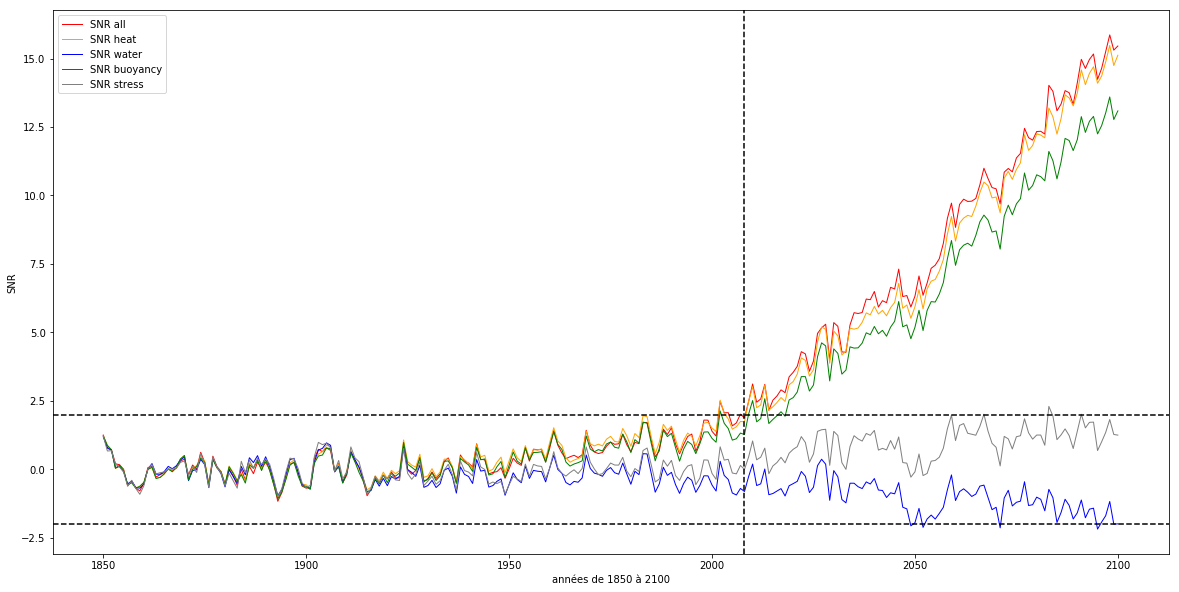

In [88]:
x = [i for i in range(1850,2101)]


plt.figure(figsize=(20,10))

plt.plot(x,SNR_mean_ind[0],"red", linewidth=1,label="SNR all")
plt.plot(x,SNR_mean_ind[1],"orange", linewidth=1,label="SNR heat")
plt.plot(x,SNR_mean_ind[2],"blue", linewidth=1,label="SNR water")
plt.plot(x,SNR_mean_ind[3],"green", linewidth=1,label="SNR buoyancy")
plt.plot(x,SNR_mean_ind[4],"grey", linewidth=1,label="SNR stress")


plt.axhline(-2,color='black',linestyle='--')
plt.axhline(2,color='black',linestyle='--')

plt.axvline(2008,color='black',linestyle='--')


axes = plt.gca()
axes.set_xlabel('années de 1850 à 2100')
axes.set_ylabel("SNR")
plt.legend()
plt.show()

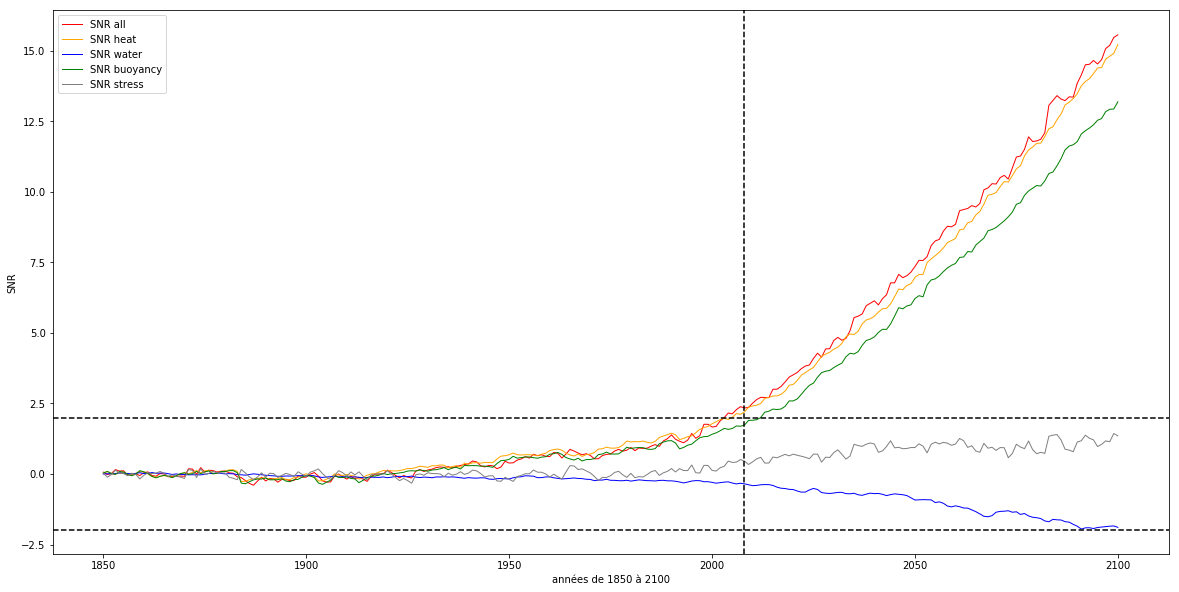

In [28]:
x = [i for i in range(1850,2101)]


plt.figure(figsize=(20,10))

plt.plot(x,SNR_mean_ind[0],"red", linewidth=1,label="SNR all")
plt.plot(x,SNR_mean_ind[1],"orange", linewidth=1,label="SNR heat")
plt.plot(x,SNR_mean_ind[2],"blue", linewidth=1,label="SNR water")
plt.plot(x,SNR_mean_ind[3],"green", linewidth=1,label="SNR buoyancy")
plt.plot(x,SNR_mean_ind[4],"grey", linewidth=1,label="SNR stress")


plt.axhline(-2,color='black',linestyle='--')
plt.axhline(2,color='black',linestyle='--')

plt.axvline(2008,color='black',linestyle='--')


axes = plt.gca()
axes.set_xlabel('années de 1850 à 2100')
axes.set_ylabel("SNR")
plt.legend()
plt.show()

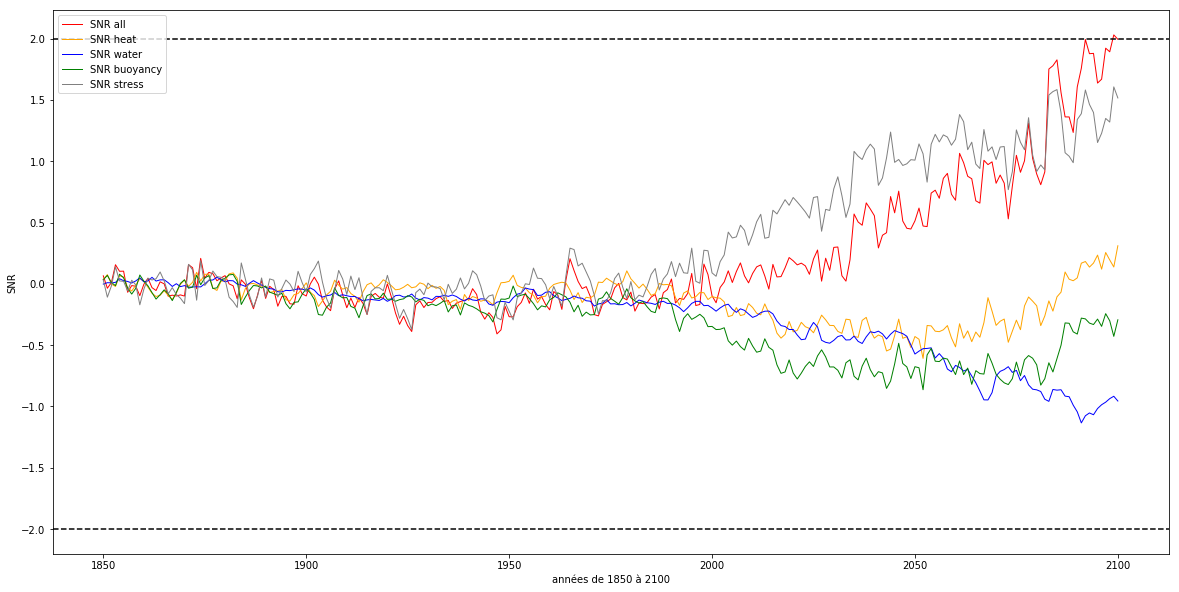

In [35]:
x = [i for i in range(1850,2101)]


plt.figure(figsize=(20,10))

plt.plot(x,SNR_mean_ind_DSL[0],"red", linewidth=1,label="SNR all")
plt.plot(x,SNR_mean_ind_DSL[1],"orange", linewidth=1,label="SNR heat")
plt.plot(x,SNR_mean_ind_DSL[2],"blue", linewidth=1,label="SNR water")
plt.plot(x,SNR_mean_ind_DSL[3],"green", linewidth=1,label="SNR buoyancy")
plt.plot(x,SNR_mean_ind_DSL[4],"grey", linewidth=1,label="SNR stress")


plt.axhline(-2,color='black',linestyle='--')
plt.axhline(2,color='black',linestyle='--')



axes = plt.gca()
axes.set_xlabel('années de 1850 à 2100')
axes.set_ylabel("SNR")
plt.legend()
plt.show()

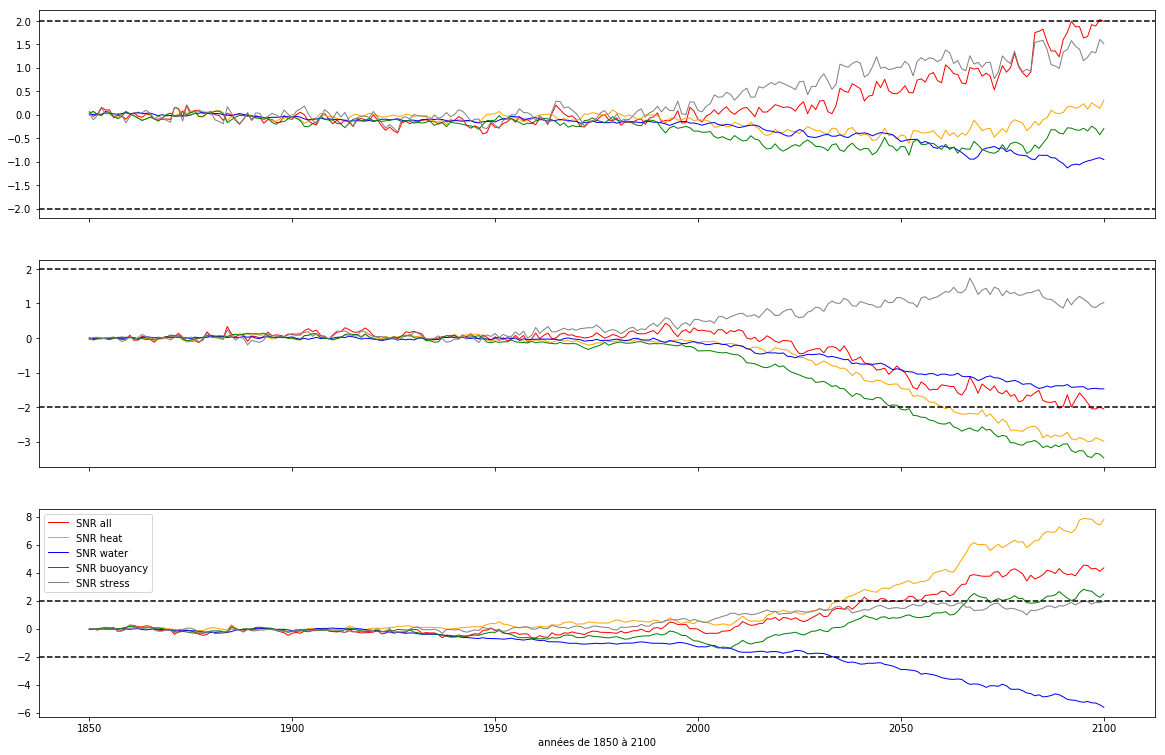

In [44]:
x = [i for i in range(1850,2101)]

fig, (ax1,ax2,ax3) =plt.subplots(3,1, figsize=(20, 13), sharex=True)



axes = [ax1,ax2,ax3]
SNR_DSL=[SNR_mean_ind_DSL,SNR_mean_PSE_DSL,SNR_mean_AT_DSL]

for i in range(3):
    axes[i].plot(x,SNR_DSL[i][0],"red", linewidth=1,label="SNR all")
    axes[i].plot(x,SNR_DSL[i][1],"orange", linewidth=1,label="SNR heat")
    axes[i].plot(x,SNR_DSL[i][2],"blue", linewidth=1,label="SNR water")
    axes[i].plot(x,SNR_DSL[i][3],"green", linewidth=1,label="SNR buoyancy")
    axes[i].plot(x,SNR_DSL[i][4],"grey", linewidth=1,label="SNR stress")


    axes[i].axhline(-2,color='black',linestyle='--')
    axes[i].axhline(2,color='black',linestyle='--')



axes = plt.gca()
axes.set_xlabel('années de 1850 à 2100')
#axes.set_ylabel("SNR")
plt.legend()
plt.show()

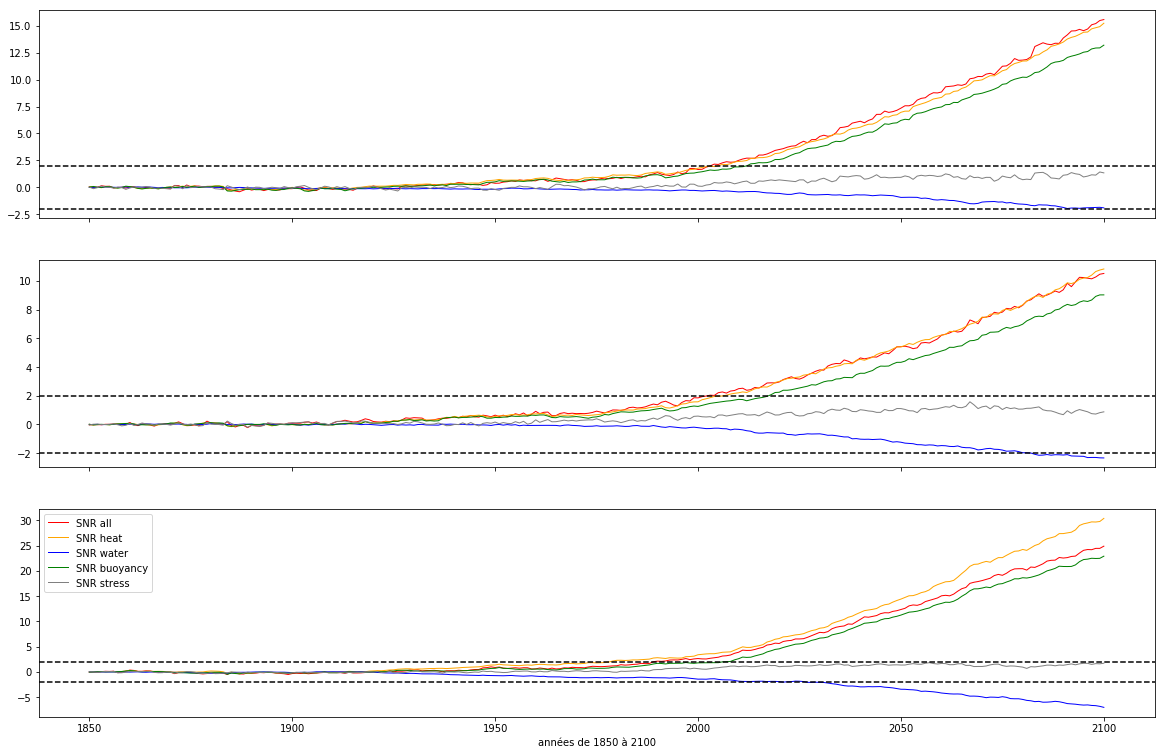

In [45]:
x = [i for i in range(1850,2101)]

fig, (ax1,ax2,ax3) =plt.subplots(3,1, figsize=(20, 13), sharex=True)



axes = [ax1,ax2,ax3]
SNR=[SNR_mean_ind,SNR_mean_PSE,SNR_mean_AT]

for i in range(3):
    axes[i].plot(x,SNR[i][0],"red", linewidth=1,label="SNR all")
    axes[i].plot(x,SNR[i][1],"orange", linewidth=1,label="SNR heat")
    axes[i].plot(x,SNR[i][2],"blue", linewidth=1,label="SNR water")
    axes[i].plot(x,SNR[i][3],"green", linewidth=1,label="SNR buoyancy")
    axes[i].plot(x,SNR[i][4],"grey", linewidth=1,label="SNR stress")


    axes[i].axhline(-2,color='black',linestyle='--')
    axes[i].axhline(2,color='black',linestyle='--')



axes = plt.gca()
axes.set_xlabel('années de 1850 à 2100')
#axes.set_ylabel("SNR")
plt.legend()
plt.show()

In [90]:
t_all_ind_r2 = 250
t_heat_ind_r2 = 250
t_water_ind_r2 = 250
t_buoy_ind_r2 = 250
t_stress_ind_r2 = 250

while SNR_mean_ind[0][t_all_ind_r2] > 2 :
    t_all_ind_r2=t_all_ind_r2-1
print(1850 + t_all_ind_r2)

while SNR_mean_ind[1][t_heat_ind_r2] > 2 :
    t_heat_ind_r2=t_heat_ind_r2-1
print(1850 + t_heat_ind_r2)

while SNR_mean_ind[2][t_water_ind_r2] > 2 :
    t_water_ind_r2=t_water_ind_r2-1
print(1850 + t_water_ind_r2)

while SNR_mean_ind[3][t_buoy_ind_r2] > 2 :
    t_buoy_ind_r2=t_buoy_ind_r2-1
print(1850 + t_buoy_ind_r2)

while SNR_mean_ind[4][t_stress_ind_r2] > 2 :
    t_stress_ind_r2=t_stress_ind_r2-1
print(1850 + t_stress_ind_r2)

2008
2008
2100
2018
2100


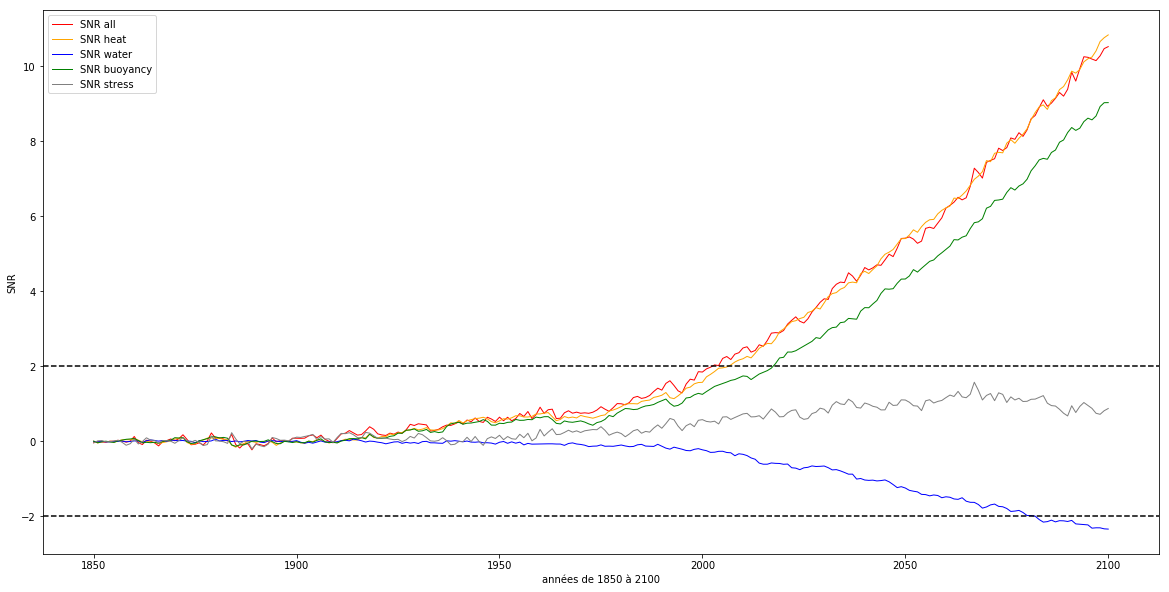

In [36]:
x = [i for i in range(1850,2101)]


plt.figure(figsize=(20,10))

plt.plot(x,SNR_mean_PSE[0],"red", linewidth=1,label="SNR all")
plt.plot(x,SNR_mean_PSE[1],"orange", linewidth=1,label="SNR heat")
plt.plot(x,SNR_mean_PSE[2],"blue", linewidth=1,label="SNR water")
plt.plot(x,SNR_mean_PSE[3],"green", linewidth=1,label="SNR buoyancy")
plt.plot(x,SNR_mean_PSE[4],"grey", linewidth=1,label="SNR stress")

plt.axhline(2,color='black',linestyle='--')
plt.axhline(-2,color='black',linestyle='--')

axes = plt.gca()
axes.set_xlabel('années de 1850 à 2100')
axes.set_ylabel("SNR")
plt.legend()
plt.show()

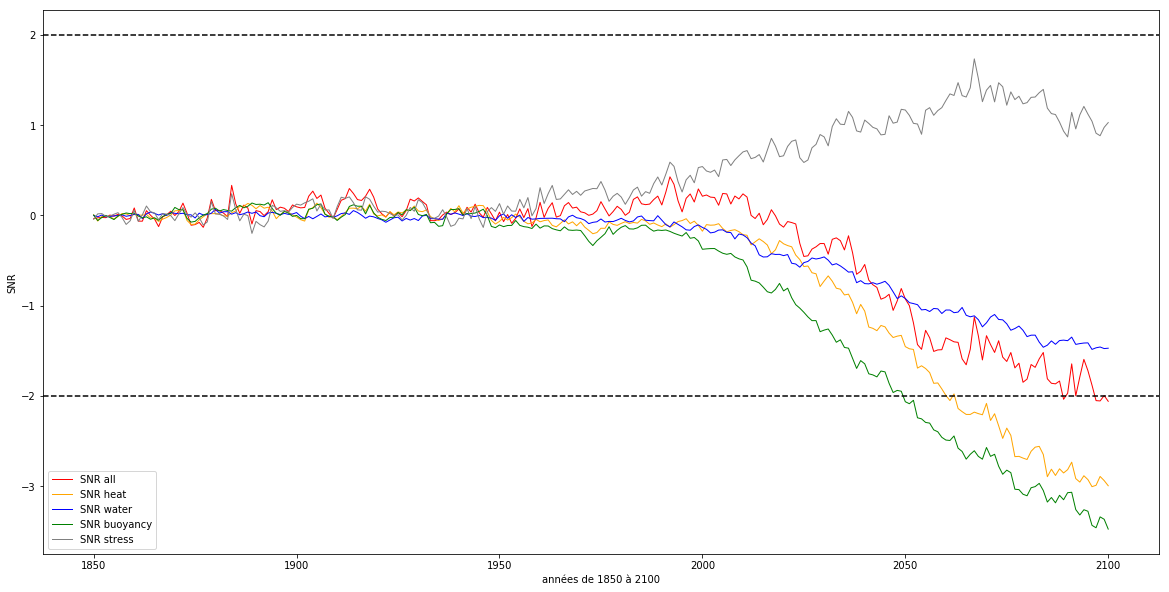

In [37]:
x = [i for i in range(1850,2101)]


plt.figure(figsize=(20,10))

plt.plot(x,SNR_mean_PSE_DSL[0],"red", linewidth=1,label="SNR all")
plt.plot(x,SNR_mean_PSE_DSL[1],"orange", linewidth=1,label="SNR heat")
plt.plot(x,SNR_mean_PSE_DSL[2],"blue", linewidth=1,label="SNR water")
plt.plot(x,SNR_mean_PSE_DSL[3],"green", linewidth=1,label="SNR buoyancy")
plt.plot(x,SNR_mean_PSE_DSL[4],"grey", linewidth=1,label="SNR stress")

plt.axhline(2,color='black',linestyle='--')
plt.axhline(-2,color='black',linestyle='--')

axes = plt.gca()
axes.set_xlabel('années de 1850 à 2100')
axes.set_ylabel("SNR")
plt.legend()
plt.show()

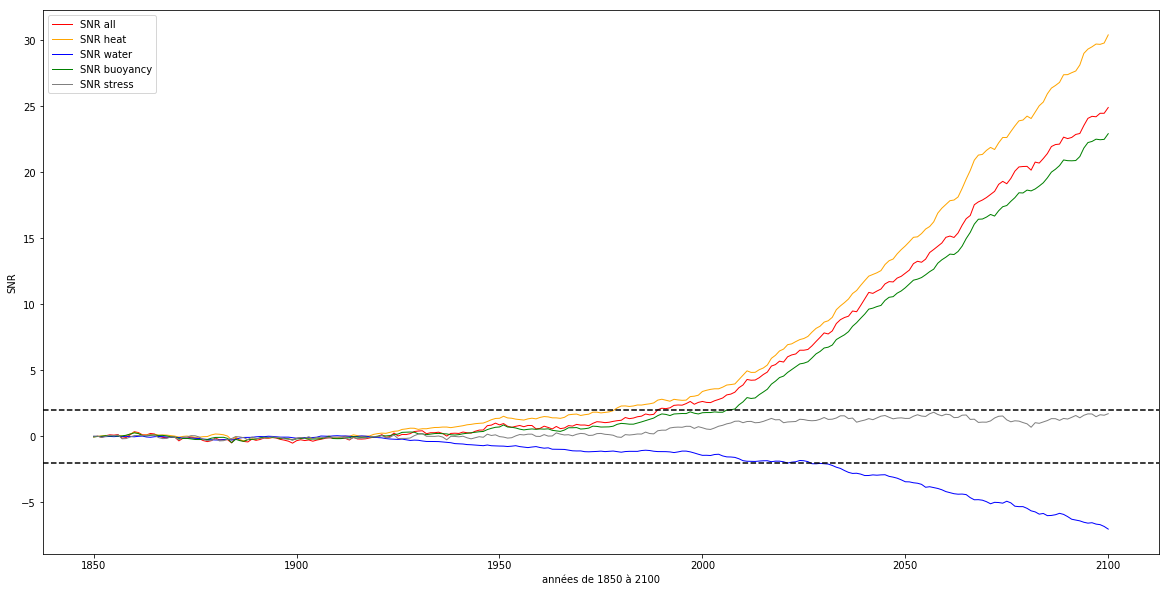

In [38]:
x = [i for i in range(1850,2101)]


plt.figure(figsize=(20,10))

plt.plot(x,SNR_mean_AT[0],"red", linewidth=1,label="SNR all")
plt.plot(x,SNR_mean_AT[1],"orange", linewidth=1,label="SNR heat")
plt.plot(x,SNR_mean_AT[2],"blue", linewidth=1,label="SNR water")
plt.plot(x,SNR_mean_AT[3],"green", linewidth=1,label="SNR buoyancy")
plt.plot(x,SNR_mean_AT[4],"grey", linewidth=1,label="SNR stress")

plt.axhline(2,color='black',linestyle='--')
plt.axhline(-2,color='black',linestyle='--')

axes = plt.gca()
axes.set_xlabel('années de 1850 à 2100')
axes.set_ylabel("SNR")
plt.legend()
plt.show()

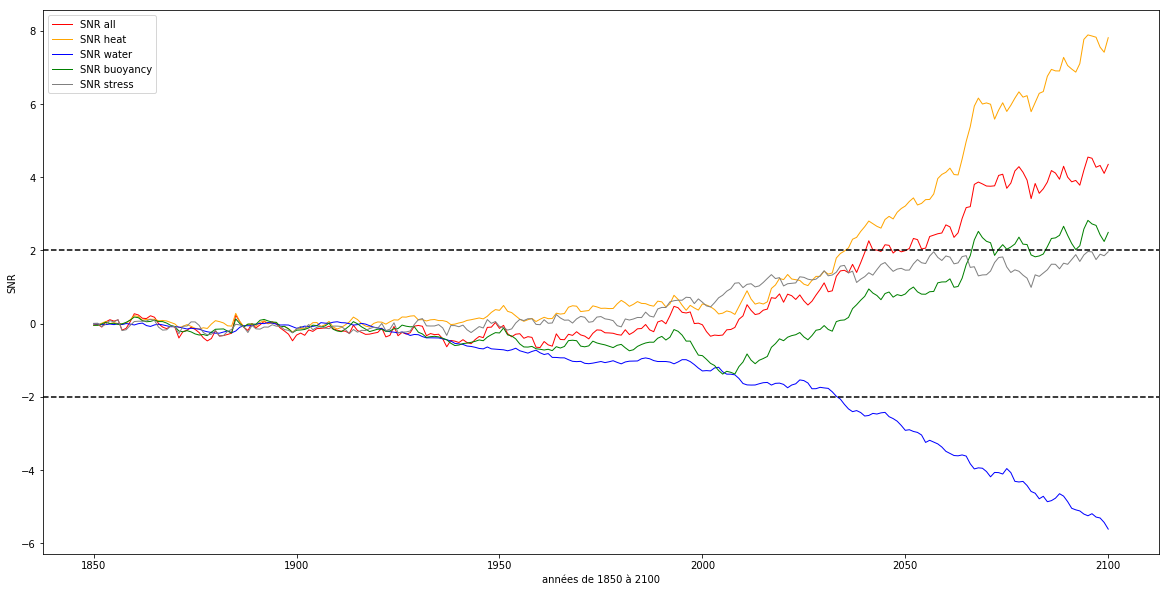

In [39]:
x = [i for i in range(1850,2101)]


plt.figure(figsize=(20,10))

plt.plot(x,SNR_mean_AT_DSL[0],"red", linewidth=1,label="SNR all")
plt.plot(x,SNR_mean_AT_DSL[1],"orange", linewidth=1,label="SNR heat")
plt.plot(x,SNR_mean_AT_DSL[2],"blue", linewidth=1,label="SNR water")
plt.plot(x,SNR_mean_AT_DSL[3],"green", linewidth=1,label="SNR buoyancy")
plt.plot(x,SNR_mean_AT_DSL[4],"grey", linewidth=1,label="SNR stress")

plt.axhline(2,color='black',linestyle='--')
plt.axhline(-2,color='black',linestyle='--')

axes = plt.gca()
axes.set_xlabel('années de 1850 à 2100')
axes.set_ylabel("SNR")
plt.legend()
plt.show()